In [29]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/crm/
cd /mnt/storage/$USER/jupyternotebooks/crm/
ln -sf /mnt/storage/data/crm/* .
ls

a                                       cluster9.gf
b                                       cluster9.gff
chr2R_cbust_segmentation.bed            dm3_cbust_segmentation.gff
chr2R_cbust_segmentation_CRM.gff        dm3-top500.bed
chr2R_cbust_segmentation.gff            Kr_bcd_gt_hb.cb
chr2R_cbust_segmentation.gff.bed        top20.bed
chr2R_cbust_segmentation_motifs.gff     top20.fa
chr2R_cbust_segmentation_top20CRMs.gff  top20.gff
cluster20.gff


In [30]:
cat Kr_bcd_gt_hb.cb

>Kr
37	0	4	3
33	6	1	4
20	11	9	4
2	0	40	2
4	1	37	2
6	3	35	0
1	3	4	36
8	4	4	28
28	6	5	5
16	8	5	15


>bcd
9	18	3	18
8	3	1	36
45	1	1	1
47	0	1	0
1	0	16	31
1	44	0	3
2	26	3	17
5	12	18	13


>gt
3	0	0	5
0	0	1	7
5	0	2	1
0	0	0	8
0	0	5	3
6	2	0	0
0	5	2	1
0	0	4	4
0	3	0	5
5	0	0	3
5	1	0	2
2	0	1	5


>hb
17	13	7	66
0	0	3	100
1	5	1	96
0	1	0	102
0	0	0	103
1	4	0	98
59	7	29	8
20	17	14	52




Score a sequence file (FASTA format), such as a chromosome, or a whole genome, for CRMs using a Hidden Markov Model implementation (ClusterBuster), with one or more PWMs as input (the PWMs will be the hidden states).

In [31]:
cbust.py -h

Usage: cbust.py [options]

Options:
  --version
         show program's version number and exit
  -h, --help
         show this help message and exit
  -f FASTAFILE, --fasta=FASTAFILE
         input FASTA file
  -2 TWOBITFILE, --2bit=TWOBITFILE
         input 2bit file
  -b BEDINPUT, --bed=BEDINPUT
         input BED file
  -C CBFILE, --cb=CBFILE
         input Cluster-Buster matrix motif file
  -B BEDOUTPUT, --bedoutput=BEDOUTPUT
         output BED file
  -G GFFOUTPUT, --gffoutput=GFFOUTPUT
         output GFF file
  -t TFNAME, --tfname=TFNAME
         transcription factor name (default = Cluster-Buster matrix motif
         filename)
  -n, --normalize-score
         Normalize scores between range of 0 to 1000 (useful for viewing in
         UCSC genome browser)
  -c CLUSTERSCORETHRESHOLD, --clusterscorethreshold=CLUSTERSCORETHRESHOLD
         Cluster score threshold (default = 5)
  -m MOTIFSCORETHRESHOLD, --motifscorethreshold=MOTIFSCORETHRESHOLD
         Motif score threshold (defa

In [32]:
# Run Cluster-Buster on chr2R and generate an output file in GFF format.
#Note: this takes about 1/2 minute
#dm3 assembly !
cbust.py -f /mnt/storage/data/dm3/chr2R.fa -C Kr_bcd_gt_hb.cb -B chr2R_cbust_segmentation.bed -c5 -m6

In [33]:
head chr2R_cbust_segmentation.bed

chr2R	19173311	19174451	CRM[Kr_bcd_gt_hb@chr2R]	21.1	+
chr2R	19173346	19173354	motif[Kr_bcd_gt_hb@chr2R]	6.8	-
chr2R	19173428	19173436	motif[Kr_bcd_gt_hb@chr2R]	6.09	+
chr2R	19173446	19173454	motif[Kr_bcd_gt_hb@chr2R]	6.15	+
chr2R	19173454	19173464	motif[Kr_bcd_gt_hb@chr2R]	9.2	+
chr2R	19173477	19173485	motif[Kr_bcd_gt_hb@chr2R]	6.37	-
chr2R	19173486	19173494	motif[Kr_bcd_gt_hb@chr2R]	6.14	-
chr2R	19173678	19173686	motif[Kr_bcd_gt_hb@chr2R]	6.12	+
chr2R	19173764	19173772	motif[Kr_bcd_gt_hb@chr2R]	7.3	+
chr2R	19173772	19173782	motif[Kr_bcd_gt_hb@chr2R]	7.53	+


You can upload this BED file to UCSC

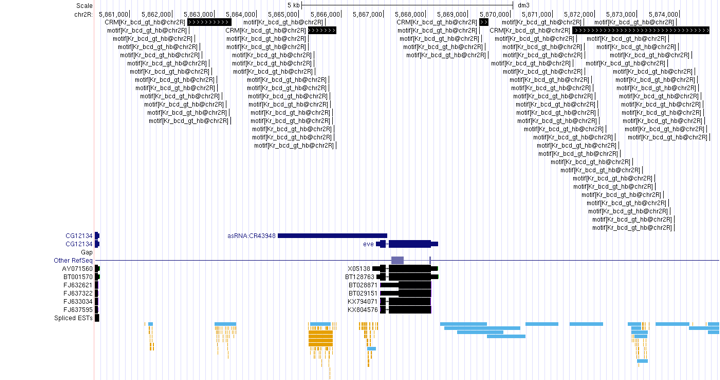

Another way to visualize the motif predictions, for the top 20 clusters

In [24]:
cat chr2R_cbust_segmentation.bed | grep -w CRM | sort -k5 -g -r | head -20  > top20.bed

sort: write failed: 'standard output': Broken pipe
sort: write error


In [25]:
cat  top20.bed

chr2R	19173311	19174451	CRM[Kr_bcd_gt_hb@chr2R]	21.1	+
chr2R	5871467	5874721	CRM[Kr_bcd_gt_hb@chr2R]	19.2	+
chr2R	21110279	21113899	CRM[Kr_bcd_gt_hb@chr2R]	19	+
chr2R	20122005	20124301	CRM[Kr_bcd_gt_hb@chr2R]	17.9	+
chr2R	17488592	17491834	CRM[Kr_bcd_gt_hb@chr2R]	17.6	+
chr2R	21123772	21126667	CRM[Kr_bcd_gt_hb@chr2R]	17.4	+
chr2R	6480480	6480920	CRM[Kr_bcd_gt_hb@chr2R]	17.2	+
chr2R	11228974	11229414	CRM[Kr_bcd_gt_hb@chr2R]	17	+
chr2R	5865217	5865888	CRM[Kr_bcd_gt_hb@chr2R]	16.9	+
chr2R	10377198	10379070	CRM[Kr_bcd_gt_hb@chr2R]	16.9	+
chr2R	18184473	18184999	CRM[Kr_bcd_gt_hb@chr2R]	16.1	+
chr2R	9517807	9519503	CRM[Kr_bcd_gt_hb@chr2R]	14.2	+
chr2R	11007600	11007938	CRM[Kr_bcd_gt_hb@chr2R]	14.2	+
chr2R	7395769	7396608	CRM[Kr_bcd_gt_hb@chr2R]	14.1	+
chr2R	19116369	19116751	CRM[Kr_bcd_gt_hb@chr2R]	13.9	+
chr2R	19085038	19087366	CRM[Kr_bcd_gt_hb@chr2R]	13.3	+
chr2R	7615243	7616756	CRM[Kr_bcd_gt_hb@chr2R]	13.2	+
chr2R	5862363	5863415	CRM[Kr_bcd_gt_hb@chr2R]	12.7	+
chr2R	18839957	18840588	CRM[

Get FASTA sequence for the regions in the BED file

In [26]:
fastaFromBed -fi /mnt/storage/data/dm3/chr2R.fa -bed top20.bed -fo top20.fa

In [27]:
cat top20.fa | head -2

>chr2R:19173311-19174451
ctttttatcataacttggccaaaatgagtcccacgccaaaaaaattaacattcttgtacatctattgatctgtactttcattttgtatcaaattttggtcaaataaagaaaatttttttttttacaattttcgcattttttgtaaggggttacatcgtcaaaattggcaaaaaatctaaaaaaattaaaatgttcaaattgaaatgtcaatcgattgggaatatgaatacgagttgaacgaggtactacaatcaagattttgatcattttatcggttgcgttagctaaaatacgtgtttttGGTCGGAAAAAAGAAGGTttttcgccatatatcagccaagaagtgttagaaacctctaggaatgacttttttgcacagctattgatccatactaatgacccatataacaaatctgcaggtttttgaaaattcgatttttgacaattttcgcattttttataaggggtaacatcatcaaaattggcaaaaaatcgaaaaaaattaaaatgctcaaattgaaatgccaatcgattgggaatacgaatacgagttcaacgaggtactacattcaagattttgatcattttatcggttgcgttagctaaaatacgtgtttttggtcggaaaaaagaaggtttttcgccatatatgggccaaaaagtgttacaaacctctaggaatgacttttttgcacagctattgatccatactaatgacccatatcacaaatctgcaggtttttgaaaatacgatttttgacaattttcacattttttgtaaggggttacatcatcaaaattggcaaaaaaccgaaaaaaattaatgtgttcaaattgaaatgccaatcaattggtgatgtaattgcgagctcaaaaatgtactacactcaagatttcgaccattttatcgactattttgtcttgaaaactgattttttGGTCGGAAAAACATGAGCTTTTCTTCATTTCTCGgcc

Score again with the motifs, to generate a GFF with "local coordinates"

In [28]:
cbust.py -f top20.fa -C Kr_bcd_gt_hb.cb -G top20.gff -c5 -m6

upload the GFF file to https://toucanjs.aertslab.org/toucanjs.html to get a local "feature map"

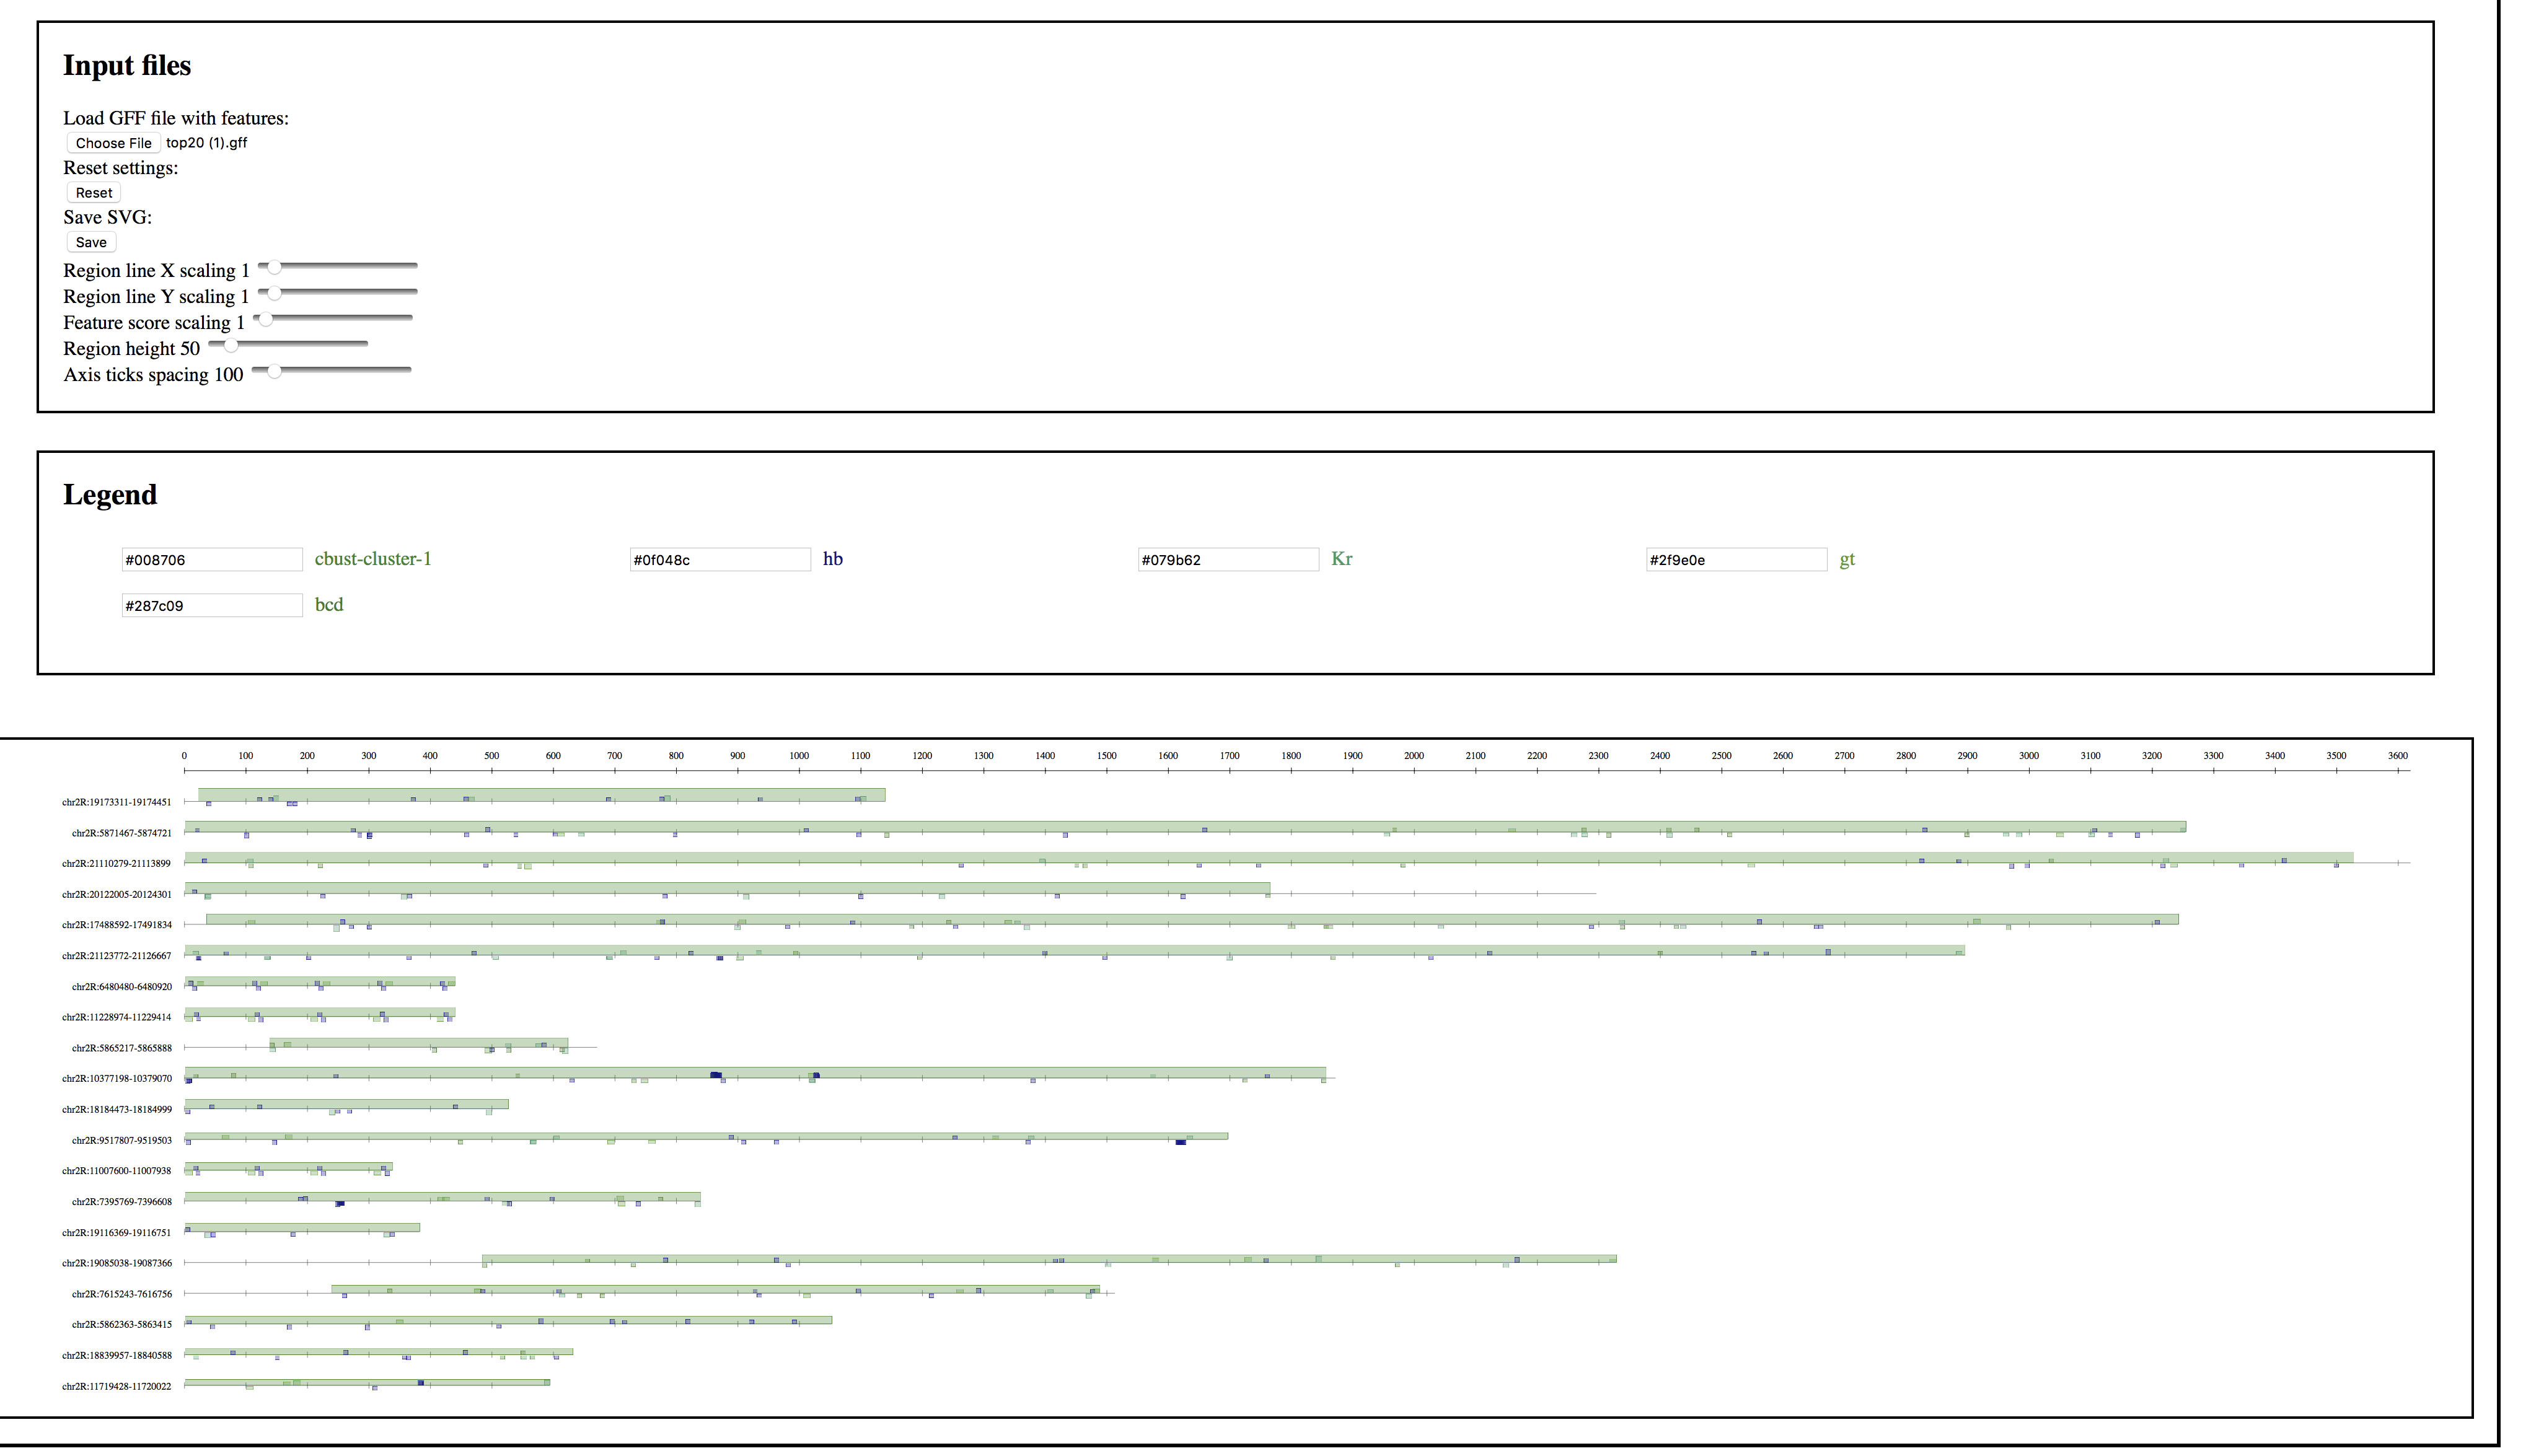

Score entire genome (takes a few minutes !)

In [11]:
#cbust.py -f /mnt/storage/data/dm3/dm3-all.fa -C Kr_bcd_gt_hb.cb -G dm3_cbust_segmentation.gff -c5 -m6

In [57]:
#cat dm3_cbust_segmentation.gff | grep -w CRM | sort -k6 -g -r | head -500 | cut -f1,4,5 > dm3-top500.bed

sort: write failed: standard output: Broken pipe
sort: write error


<h1> Score a region, and re-calculate the genomic coordinates

In [38]:
cbust.py -f eve-locus.tfa -C Kr_bcd_gt_hb.cb -B eve-locus.bed  

In [39]:
cat eve-locus.bed

dm3_dna	11291	14545	CRM[Kr_bcd_gt_hb@dm3_dna]	19.2	+
dm3_dna	11307	11315	motif[Kr_bcd_gt_hb@dm3_dna]	6.98	+
dm3_dna	11387	11395	motif[Kr_bcd_gt_hb@dm3_dna]	8.94	-
dm3_dna	11560	11568	motif[Kr_bcd_gt_hb@dm3_dna]	6.22	+
dm3_dna	11571	11579	motif[Kr_bcd_gt_hb@dm3_dna]	8.26	-
dm3_dna	11587	11595	motif[Kr_bcd_gt_hb@dm3_dna]	9.5	-
dm3_dna	11588	11596	motif[Kr_bcd_gt_hb@dm3_dna]	6.49	-
dm3_dna	11745	11753	motif[Kr_bcd_gt_hb@dm3_dna]	7.14	-
dm3_dna	11779	11787	motif[Kr_bcd_gt_hb@dm3_dna]	7.94	+
dm3_dna	11825	11833	motif[Kr_bcd_gt_hb@dm3_dna]	6.62	-
dm3_dna	11889	11897	motif[Kr_bcd_gt_hb@dm3_dna]	6.41	-
dm3_dna	11896	11908	motif[Kr_bcd_gt_hb@dm3_dna]	6.13	-
dm3_dna	11930	11940	motif[Kr_bcd_gt_hb@dm3_dna]	6.2	-
dm3_dna	12084	12092	motif[Kr_bcd_gt_hb@dm3_dna]	6.76	-
dm3_dna	12297	12305	motif[Kr_bcd_gt_hb@dm3_dna]	6.01	+
dm3_dna	12383	12391	motif[Kr_bcd_gt_hb@dm3_dna]	7.19	-
dm3_dna	12428	12436	motif[Kr_bcd_gt_hb@dm3_dna]	7.6	-
dm3_dna	12718	12726	motif[Kr_bcd_gt_hb@dm3_dna]	8.03	-
dm3_dna	12945	1

In [40]:
chr=chr2R

In [44]:
offset=5860177

In [45]:
echo $offset

5860177


In [47]:
cat eve-locus.bed | awk '{print "chr2R",$2+'$offset',$3+'$offset',$4,$5,$6}'  | tr ' ' '\t'


chr2R	5871468	5874722	CRM[Kr_bcd_gt_hb@dm3_dna]	19.2	+
chr2R	5871484	5871492	motif[Kr_bcd_gt_hb@dm3_dna]	6.98	+
chr2R	5871564	5871572	motif[Kr_bcd_gt_hb@dm3_dna]	8.94	-
chr2R	5871737	5871745	motif[Kr_bcd_gt_hb@dm3_dna]	6.22	+
chr2R	5871748	5871756	motif[Kr_bcd_gt_hb@dm3_dna]	8.26	-
chr2R	5871764	5871772	motif[Kr_bcd_gt_hb@dm3_dna]	9.5	-
chr2R	5871765	5871773	motif[Kr_bcd_gt_hb@dm3_dna]	6.49	-
chr2R	5871922	5871930	motif[Kr_bcd_gt_hb@dm3_dna]	7.14	-
chr2R	5871956	5871964	motif[Kr_bcd_gt_hb@dm3_dna]	7.94	+
chr2R	5872002	5872010	motif[Kr_bcd_gt_hb@dm3_dna]	6.62	-
chr2R	5872066	5872074	motif[Kr_bcd_gt_hb@dm3_dna]	6.41	-
chr2R	5872073	5872085	motif[Kr_bcd_gt_hb@dm3_dna]	6.13	-
chr2R	5872107	5872117	motif[Kr_bcd_gt_hb@dm3_dna]	6.2	-
chr2R	5872261	5872269	motif[Kr_bcd_gt_hb@dm3_dna]	6.76	-
chr2R	5872474	5872482	motif[Kr_bcd_gt_hb@dm3_dna]	6.01	+
chr2R	5872560	5872568	motif[Kr_bcd_gt_hb@dm3_dna]	7.19	-
chr2R	5872605	5872613	motif[Kr_bcd_gt_hb@dm3_dna]	7.6	-
chr2R	5872895	5872903	motif[Kr_bcd_g

In [48]:
cat eve-locus.bed | awk '{print "chr2R",$2+'$offset',$3+'$offset',$4,$5,$6}'  | tr ' ' '\t' > eve-locus-gcoord.bed